In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize']=10,6
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler





Using TensorFlow backend.
d:\Anaconda\envs\navya\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\Anaconda\envs\navya\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\Anaconda\envs\navya\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\Anaconda\envs\navya\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Fu

In [2]:
dataset=pd.read_csv("../input/rain.csv",encoding = "ISO-8859-1")
dataset.dtypes

SUBDIVISION     object
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
Jan-Feb        float64
Mar-May        float64
Jun-Sep        float64
Oct-Dec        float64
dtype: object

In [3]:
groups = dataset.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','NOV','DEC']
data=groups.get_group(('BIHAR'))
data.head()

d:\Anaconda\envs\navya\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,NOV,DEC
897,1901,51.8,19.6,11.9,1.1,65.6,66.3,245.9,319.4,155.1,7.3,0.1
898,1902,4.6,0.7,24.3,17.3,66.3,118.2,361.0,225.5,358.7,1.1,0.0
899,1903,5.3,4.7,2.0,4.7,28.2,192.9,115.0,342.6,173.9,0.1,0.0
900,1904,6.3,1.7,3.5,5.3,118.7,191.6,394.4,351.3,84.4,10.6,3.8
901,1905,16.0,30.1,32.6,21.4,77.5,50.5,409.1,495.3,353.9,0.0,0.6


In [4]:
data=data.melt(['YEAR']).reset_index()
data.head()


,index,YEAR,variable,value
0,0,1901,JAN,51.8
1,1,1902,JAN,4.6
2,2,1903,JAN,5.3
3,3,1904,JAN,6.3
4,4,1905,JAN,16.0


In [5]:
df= data[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,51.8
115,115,1901,FEB,19.6
230,230,1901,MAR,11.9
345,345,1901,APR,1.1
460,460,1901,MAY,65.6


In [6]:
df.columns=['INDEX','YEAR','Month','avg_rainfall']

In [7]:
df.head()

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,JAN,51.8
115,115,1901,FEB,19.6
230,230,1901,MAR,11.9
345,345,1901,APR,1.1
460,460,1901,MAY,65.6


In [8]:
d={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df['Month']=df['Month'].map(d)
df.head(12)

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,1,51.8
115,115,1901,2,19.6
230,230,1901,3,11.9
345,345,1901,4,1.1
460,460,1901,5,65.6
575,575,1901,6,66.3
690,690,1901,7,245.9
805,805,1901,8,319.4
920,920,1901,9,155.1
1035,1035,1901,11,7.3


In [9]:
df['Date']=pd.to_datetime(df.assign(Day=1).loc[:,['YEAR','Month','Day']])
df.head(12)

,INDEX,YEAR,Month,avg_rainfall,Date
0,0,1901,1,51.8,1901-01-01
115,115,1901,2,19.6,1901-02-01
230,230,1901,3,11.9,1901-03-01
345,345,1901,4,1.1,1901-04-01
460,460,1901,5,65.6,1901-05-01
575,575,1901,6,66.3,1901-06-01
690,690,1901,7,245.9,1901-07-01
805,805,1901,8,319.4,1901-08-01
920,920,1901,9,155.1,1901-09-01
1035,1035,1901,11,7.3,1901-11-01


In [10]:
cols=['avg_rainfall']
dataset=df[cols]
dataset.head()

,avg_rainfall
0,51.8
115,19.6
230,11.9
345,1.1
460,65.6


In [11]:
series=dataset
series.head()

,avg_rainfall
0,51.8
115,19.6
230,11.9
345,1.1
460,65.6


In [12]:
series.shape

(1265, 1)

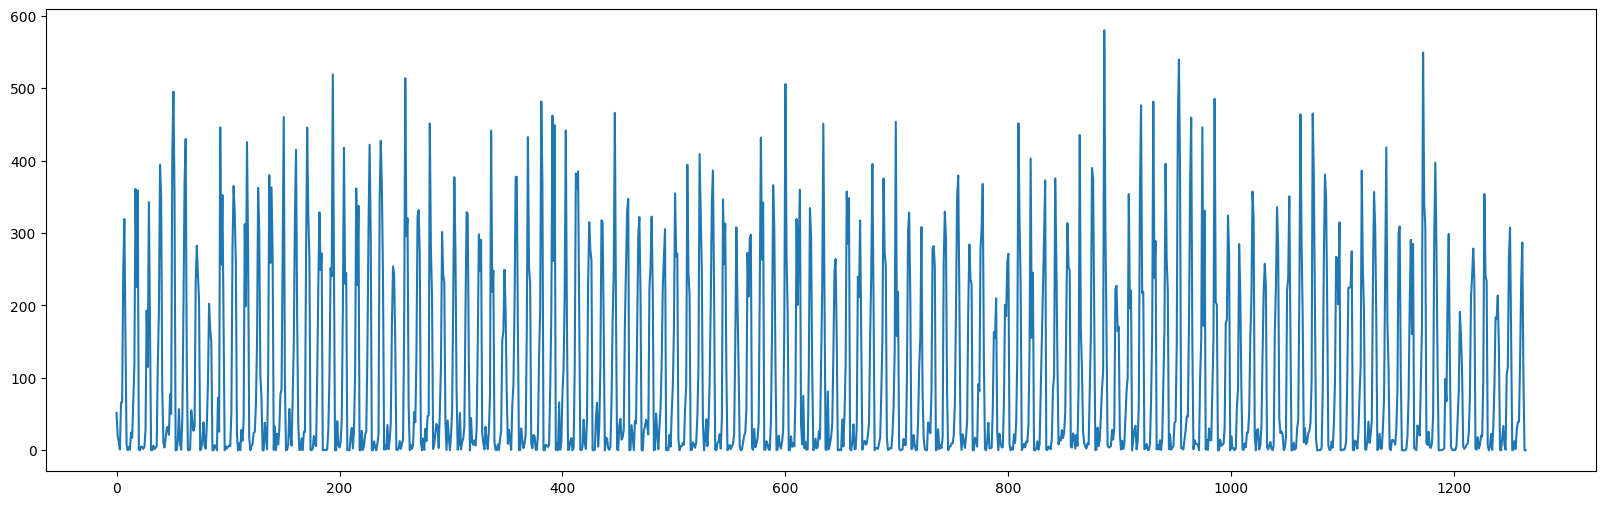

In [13]:
pyplot.figure(figsize=(20,6))
pyplot.plot(series.values)
pyplot.show()

In [14]:
# Get the raw data values from the pandas data frame.
data_raw = series.values.astype("float32")

# We apply the MinMax scaler from sklearn
# to normalize data in the (0, 1) interval.
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(data_raw)

# Print a few values.
dataset[0:5]

array([[0.08929496],
       [0.03378728],
       [0.02051371],
       [0.00189622],
       [0.11308396]], dtype=float32)

In [15]:
# Using 60% of data for training, 40% for validation.
TRAIN_SIZE = 0.60
window_size = 1
n_steps = 12

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (759, 506)


In [16]:
def create_dataset(dataset, window_size=1, n_steps=1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - n_steps + 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size:i + window_size + n_steps, 0])  # N-step ahead
    return np.array(data_X), np.array(data_Y)


In [17]:
def fit_model(train_X, train_Y, window_size=1, n_steps=1):
    model = Sequential()
    
    # LSTM layer for time-series sequence
    model.add(LSTM(2000, activation='tanh', inner_activation='hard_sigmoid', input_shape=(1, window_size)))
    model.add(Dropout(0.2))
    
    # Fully connected layers with dropout
    model.add(Dense(500))
    model.add(Dropout(0.4))
    model.add(Dense(500))
    model.add(Dropout(0.4))
    model.add(Dense(400))
    model.add(Dropout(0.4))
    
    # Output layer for N-step prediction
    model.add(Dense(n_steps, activation='linear'))
    
    model.compile(loss="mean_squared_error", optimizer="adam")
    model.fit(train_X, train_Y, epochs=100, batch_size=64)
    
    return model


In [18]:
train_X, train_Y = create_dataset(train, window_size, n_steps)
test_X, test_Y = create_dataset(test, window_size, n_steps)

# Reshape input data for Keras LSTM.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))


In [19]:
# Fit the model
model1 = fit_model(train_X, train_Y, window_size, n_steps)


d:\Anaconda\envs\navya\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(2000, activation="tanh", input_shape=(1, 1), recurrent_activation="hard_sigmoid")`
  """


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
747/747 [==============================] - 3s 4ms/step - loss: 0.0550
Epoch 2/100
747/747 [==============================] - 2s 3ms/step - loss: 0.0438
Epoch 3/100
747/747 [==============================] - 2s 3ms/step - loss: 0.0430
Epoch 4/100
747/747 [==============================] - 2s 3ms/step - loss: 0.0428
Epoch 5/100
747/747 [==============================] - 2s 3ms/step - loss: 0.0428
Epoch 6/100
747/747 [==============================] - 2s 3ms/step - loss: 0.0429
Epoch 7/100
747/747 [==============================] - 2s 3ms/step - loss: 0.0423
Epoch 8/100
747/747 [==============================] - 2s 3ms/step - loss: 0.0430
Epoch 9/100
747/747 [==============================] - 2s 3ms/step - loss: 0.0423
Epoch 10/100
747/747 [==============================] - 2s 3ms/step - loss: 0.0423
Epoch 11/100
747/747 [==============================] - 2s 3ms/step - loss: 0.0419
E

In [20]:
import math

def predict_and_score(model, X, Y, n_steps=1):
    # Make predictions on the original scale of the data.
    pred = scaler.inverse_transform(model.predict(X))
    
    # Prepare Y data to also be on the original scale for interpretability.
    orig_data = scaler.inverse_transform(Y)
    
    # Calculate RMSE for each of the N predicted steps.
    rmse = 0
    for i in range(n_steps):
        rmse += math.sqrt(mean_squared_error(orig_data[:, i], pred[:, i]))
    
    return rmse / n_steps, pred

# Calculate RMSE for training and test sets
rmse_train, train_predict = predict_and_score(model1, train_X, train_Y, n_steps)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y, n_steps)

print(f"Training data score (RMSE): {rmse_train:.2f}")
print(f"Test data score (RMSE): {rmse_test:.2f}")


Training data score (RMSE): 113.62
Test data score (RMSE): 109.79


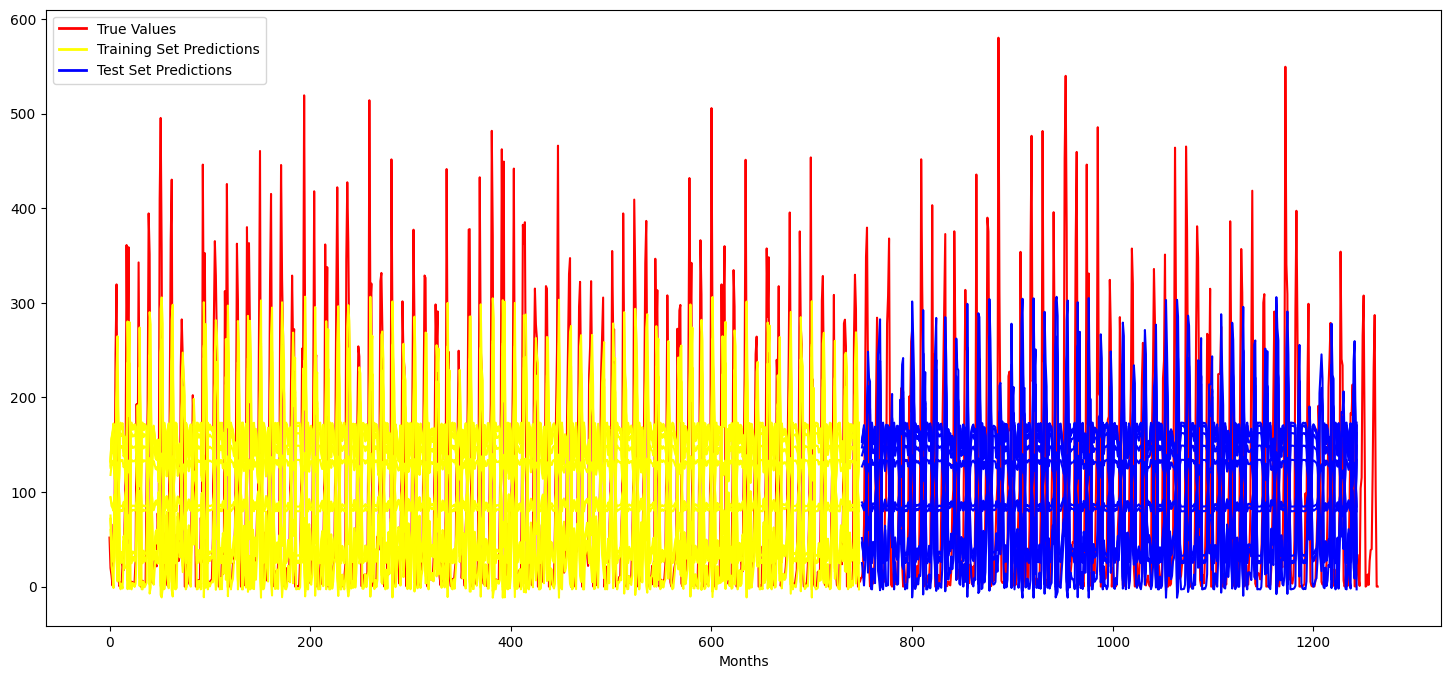

In [21]:
# Start with training predictions.
train_predict_plot = np.empty((len(dataset), n_steps))
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

# Add test predictions.
test_predict_plot = np.empty((len(dataset), n_steps))
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(train_predict) + (window_size * 2) + 1 + len(test_predict), :] = test_predict

# Create the plot.
plt.figure(figsize=(18, 8))

# Plot true values, training predictions, and test predictions with only one label per series.
plt.plot(scaler.inverse_transform(dataset), color='red')
plt.plot(train_predict_plot, color='yellow')
plt.plot(test_predict_plot, color='blue')

# Manually create custom handles and labels for the legend.
handles = [
    plt.Line2D([0], [0], color='red', lw=2),
    plt.Line2D([0], [0], color='yellow', lw=2),
    plt.Line2D([0], [0], color='blue', lw=2)
]
labels = ['True Values', 'Training Set Predictions', 'Test Set Predictions']

# Add the legend manually with the custom handles and labels.
plt.legend(handles=handles, labels=labels, loc='upper left')


# Set the x-axis label.
plt.xlabel("Months")

# Show the plot.
plt.show()


In [22]:
# Example input data
new_data = np.array([[383.5]])  # Example input

# Rescale new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Reshape data for prediction
new_data_scaled = np.reshape(new_data_scaled, (new_data_scaled.shape[0], 1, new_data_scaled.shape[1]))

# Predict the next N steps
predictions = model1.predict(new_data_scaled)
predictions_original_scale = scaler.inverse_transform(predictions)

print(f"Predictions (in original scale): {predictions_original_scale}")


Predictions (in original scale): [[231.76411   132.39694    49.889484    4.185977    3.1505058  -6.0241346
    6.947999   48.58316   135.13467   242.3743    287.12238   241.93066  ]]


In [2]:
# Saving the models
import joblib
joblib.dump(model1, 'rainfall_prediction.pkl')
joblib.dump(scaler, 'rainfall_scaler.pkl')


NameError: name 'model1' is not defined

In [5]:
#Manual prediction of values
model = joblib.load('rainfall_prediction.pkl')
scaler = joblib.load('rainfall_scaler.pkl')
new_data_scaled = scaler.transform(new_data)
# Reshape data for prediction
new_data_scaled = np.reshape(new_data_scaled, (new_data_scaled.shape[0], 1, new_data_scaled.shape[1]))

# Predict the next N steps
predictions = model.predict(new_data_scaled)
predictions_original_scale = scaler.inverse_transform(predictions)

print(f"Predictions (in original scale): {predictions_original_scale}")

NameError: name 'np' is not defined